# Fandango Popular Movie Ratings – A Comparative Study of 2015 and 2016

## 1. Is Fandango Still Inflating Ratings?

In October `2015`, a data journalist named **Walt Hickey** analyzed movie ratings data and found strong evidence suggesting that Fandango's rating system was biased and dishonest. [Fandango](https://www.fandango.com/) is an online movie ratings aggregator. He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) – a great piece of data journalism that's totally worth reading.

Fandango displays a `5-star` rating system on their website, where the minimum rating is `0` stars and the maximum is `5` stars.

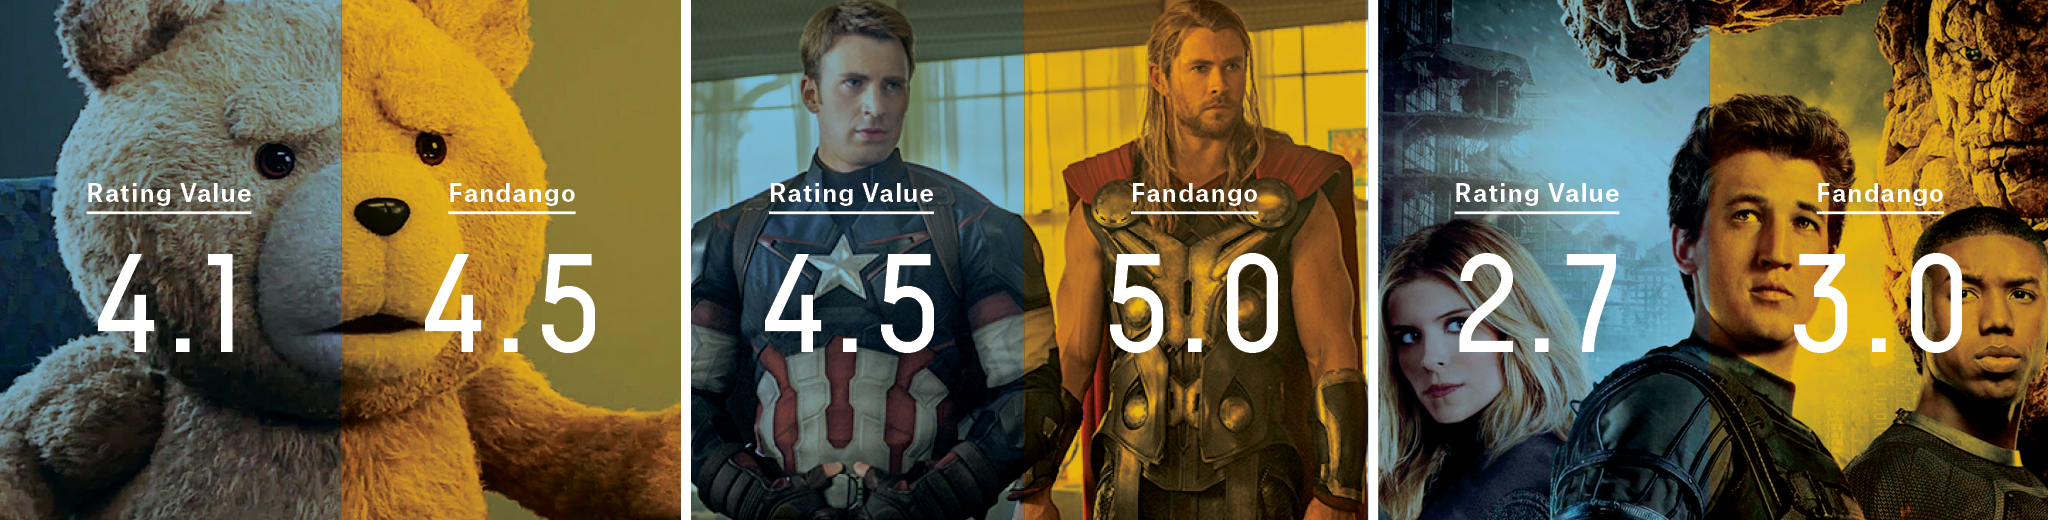

Hickey found a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He discovered that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a `4.1` movie would be rounded up to `4.5` stars, not to `4` stars as one might expect.
- In `8%` of the ratings analyzed, the rounding was done to the nearest whole star. For instance, a `4.5` rating would be rounded up to `5` stars.
- For one movie rating, the rounding was completely bizarre – from a rating of `4` in the HTML of the page to a displayed rating of `5` stars.

Fandango's officials replied that the biased rounding was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## 2. Exploring the Datasets

One of the best ways to determine whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics before and after the analysis. Fortunately, we have ready-made data for both periods:

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system prior to his analysis.
- A [Dataquest](https://www.dataquest.io/) team member collected movie ratings data for movies released in `2016` and `2017`. This data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17), and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set pandas option to display up to 100 columns
pd.options.display.max_columns = 100

# Load the datasets into DataFrames
fandango_before = pd.read_csv('Datasets/fandango_score_comparison.csv')
fandango_after = pd.read_csv('Datasets/movie_ratings_16_17.csv')

# Display the first 3 rows of each DataFrame
display(fandango_before.head(3))
display(fandango_after.head(3))

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


The first dataset contains movie ratings from various sources including [Rotten Tomatoes](https://www.rottentomatoes.com/), [Metacritic](https://www.metacritic.com/), [IMDB](https://www.imdb.com/), and [Fandango](https://fandango.com/) for movies released prior to Hickey's analysis. It includes detailed metrics such as normalized ratings and vote counts. For instance, `Avengers: Age of Ultron (2015)` has a Fandango rating of `5.0` stars but an actual rating value of `4.5`, showing a `0.5` difference.

The second dataset provides movie ratings for films released in `2016` and `2017`, after Hickey's analysis. It includes similar metrics but in a more streamlined format. For example, `10 Cloverfield Lane (2016)` has a Fandango rating of `3.5` stars, with corresponding normalized scores for other rating sources.

Next, we're going to isolate only the columns that provide information about Fandango to make the relevant data more readily available.

In [2]:
# Isolate Fandango-related columns and create copies to avoid 'SettingWithCopyWarning'
fandango_before = fandango_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                                   'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = fandango_after[['movie', 'year', 'fandango']].copy()

# Display the first 3 rows of each DataFrame
display(fandango_before.head(3))
display(fandango_after.head(3))

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


## 3. Changing the Goal of Analysis

The population of interest for our analysis comprises all the movie ratings stored on Fandango's website, regardless of the releasing year. Because we want to determine if the parameters of this population changed after Hickey's analysis, we sampled the population at two different periods of time. To describe the population, we need to make sure that the samples are representative. Otherwise, we should expect a large sampling error and, ultimately, inaccurate conclusions.

From Hickey's article and the `README.md` of the [Fandango file](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that Walt used the following sampling criteria:

- The movie must had at least `30` fan ratings on Fandango's website at the time of sampling (`August 24, 2015`).
- The movie must had tickets on sale in `2015`.

The sampling was clearly not random because not every movie had the chance to be included in the sample. It seems less likely that this sample is representative of the entire population we're interested in describing, mostly because this sample is subject to **temporal trends**. In other words, movies in `2015` might have been outstandingly good or bad compared to other years.

The sampling conditions for the sample the Dataquest team member collected were the following (we can acess the `README.md` file directly using [this link](https://github.com/mircealex/Movie_ratings_2016_17)):

- The movie must be released in `2016` or later.
- The movie must had a considerable number of votes and reviews. However, the numbers are unspecified.

This second sample is also subject to temporal trends, and it's unlikely to be representative of our population of interest.

Both authors had certain research questions in mind when they sampled data, so their sampling method is called **purposive sampling**. Since they used a set of criteria to get a sample that would fit their questions, they don't seem too useful for us. As a result, we can either collect new data or change the goal of our analysis.

Instead of trying to determine whether there has been any change in Fandango's rating system following Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in `2015` and `2016`. This new goal should be a fairly good proxy for our initial one.

## 4. Isolating the Samples of Interest

With the new goal, we now have two populations, one for each year, that we want to describe and compare with each other – all Fandango's ratings for popular movies released in `2015` and `2016`.

The term `popular` is vague so we need to define it with precision before continuing. We'll use Hickey's benchmark of `30` fan ratings and consider a movie as `popular` only if it has `30` fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over `30` fan ratings).

One quick way to check the representativity of this sample is to randomly select `10` movies from it, and then check the number of fan ratings manually on Fandango's website. Ideally, at least `8` out of the `10` selected movies should have `30` fan ratings or more.

In [3]:
# Sample 10 random rows with a specified random state for reproducibility
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Here are the fan ratings we found on Fandango's website in April `2018`:

| Movie                                   | Fan ratings |
| :-------------------------------------- | ----------- |
| Mechanic: Resurrection                  | 2247        |
| Warcraft                                | 7271        |
| Max Steel                               | 493         |
| Me Before You                           | 5263        |
| Fantastic Beasts and Where to Find Them | 13400       |
| Cell                                    | 17          |
| Genius                                  | 127         |
| Sully                                   | 11877       |
| A Hologram for the King                 | 500         |
| Captain America: Civil War              | 35057       |

We see that `9` out of the `10` movies above are `popular`. This is enough for us to proceed with a little more confidence. Let's also double-check the other dataset for popular movies; the documentation states clearly that it only contains movies with at least `30` fan ratings.

In [4]:
# Count the number of movies with less than 30 votes
sum(fandango_before['Fandango_votes'] < 30)

0

If we explore the two datasets, we'll notice that there are movies with release years different than `2015` or `2016`. For our purposes, we'll need to select only the movies released in `2015` and `2016`. For now, let's start with Hickey's dataset:

In [5]:
# Extract the year from the 'FILM' column, and examine the frequency distribution for 'Year'
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_before['Year'].value_counts()

Year
2015    129
2014     17
Name: count, dtype: int64

In [6]:
# Select the movies released in 2015 from Hickey's dataset and count their frequency
fandango_2015 = fandango_before[fandango_before['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

Year
2015    129
Name: count, dtype: int64

Let's now isolate the movies in the Dataquest team member's dataset.

In [7]:
# Examine the frequency distribution for "year"
fandango_after['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [8]:
# Select the movies released in 2016 from the Dataquest team member's dataset
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

year
2016    191
Name: count, dtype: int64

## 5. Comparing the Distribution Shapes of the Samples

After all the preliminary steps, we can now start analyzing our two samples. Once again, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in `2015` and `2016`.

Let's start with making a high-level comparison between the distribution shapes of popular movie ratings for both samples.

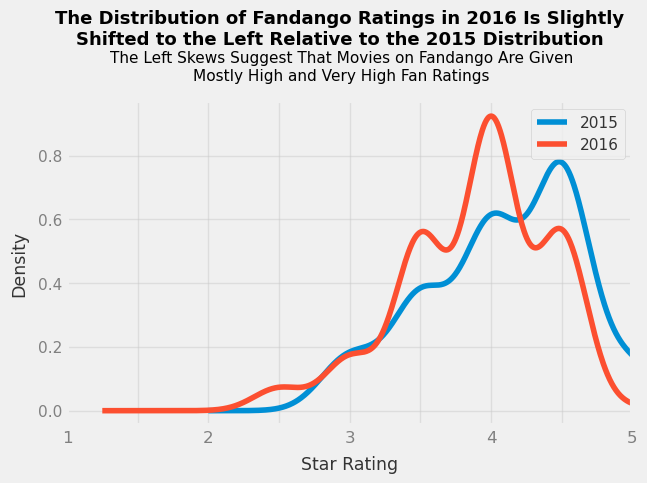

In [9]:
# Apply the 'fivethirtyeight' style to the plot
plt.style.use('fivethirtyeight')

# Plot KDE for Fandango ratings in 2015 and 2016
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(6.5, 4))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

# Add main title and subtitle
plt.suptitle('The Distribution of Fandango Ratings in 2016 Is Slightly\n\
Shifted to the Left Relative to the 2015 Distribution',
             x=0.5, y=1.11, size=13, ha='center', weight='bold')
plt.title('The Left Skews Suggest That Movies on Fandango Are Given\n\
Mostly High and Very High Fan Ratings',
          x=0.485, y=1.04, size=11, ha='center')

# Set axis labels, and adjust legend's size and label color
plt.xlabel('Star Rating', c='#333333', labelpad=7, size=12.5)
plt.ylabel('Density', c='#333333', labelpad=7, size=12.5)
plt.legend(fontsize=11, labelcolor='#333333')

# Set x-axis limits, and customize ticks, labels, and gridlines
plt.xlim(1, 5)
plt.xticks(np.arange(1, 5.5, 0.5), [1, '', 2, '', 3, '', 4, '', 5], fontsize=12, c='grey')
plt.yticks(fontsize=11, c='grey')
plt.grid(alpha=0.5)

# Display the plot
plt.show()

In the figure above, we observe that both distributions are strongly left-skewed. Moreover, the distribution of Fandango ratings in `2016` is slightly shifted to the left relative to the `2015` distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, such ratings are a bit dubious. It'd be really interesting to investigate this further in a separate project, as this is irrelevant for the current goal of our analysis.

The left shift of the distribution of Fandango ratings in `2016` implies that ratings were slightly lower in `2016` compared to `2015`. This suggests that there may be a difference between Fandango's ratings for popular movies in `2015` and `2016`.

## 6. Comparing the Distributions' Relative Frequencies

While comparing the distributions of Fandango ratings in `2015` and `2016` using **kernel density** plots was a great start, we need to analyze more granular information. Hence, we're going to examine the frequency tables of the two distributions. Since the datasets have different numbers of movies, we can normalize the tables and show percentages.

In [10]:
# Print the year "2015" and a separator to distinguish between the two tables
print('2015' + '\n' + '-' * 16)

# Calculate the percentage distribution of Fandango ratings for 2015 and sort by index
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [11]:
# Print the year "2016" and a separator
print('2016' + '\n' + '-' * 16)

# Calculate the percentage distribution of Fandango ratings for 2016 and sort by index
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

In `2016`, around `0.52%` of the movies had a perfect rating of `5` stars, compared to `2015` when the percentage was close to `7%`. Ratings of `4.5` were also more popular in `2015` – there were approximately `13%` more movies rated with a `4.5` in `2015` compared to `2016`.

The minimum rating is lower in `2016` – `2.5` stars instead of `3`, which was the minimum of `2015`. For some other ratings, the percentages went up in `2016`. There was a greater percentage of movies in `2016` that received `3.5` and `4` stars, compared to `2015`. Since `3.5` and `4.0` are relatively high ratings, this challenges the direction of the change we saw on the kernel density plots.

## 7. Determining the Direction of Difference for Ratings

We observed that the direction of the difference in Fandango ratings for `2015` and `2016` in the percentage frequency tables is not as clear as it is on the kernel density plots.

To get a more precise picture about the direction of the change, we'll first compute the `mean`, `median`, and `mode` for each distribution of popular movie ratings.

In [12]:
# Calculate the mean for Fandango ratings in 2015 and 2016
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

# Calculate the median for Fandango ratings in 2015 and 2016
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

# Calculate the mode for Fandango ratings in 2015 and 2016
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

# Create a summary DataFrame with mean, median, and mode for 2015 and 2016 ratings
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]

# Assign index labels and return the summary DataFrame
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Now, we'll compare these statistics using bar plots to determine the direction of the difference in popular movie ratings.

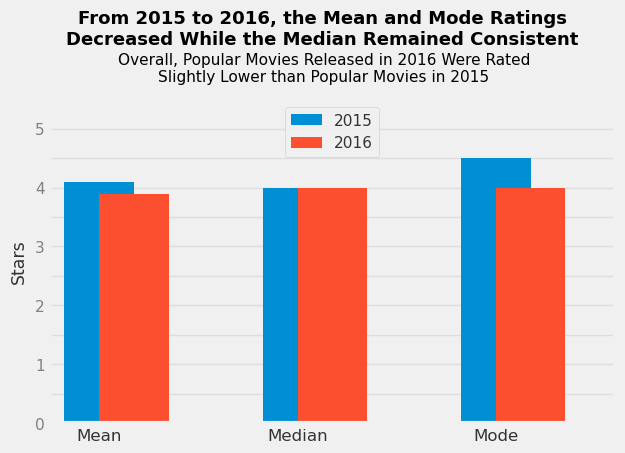

In [13]:
# Plot the summary statistics for 2015 and 2016 as bar plots
summary['2015'].plot.bar(color='#008fd5', align='center', label='2015', width=.35)
summary['2016'].plot.bar(color='#fc4f30', align='edge', label='2016', width=.35,
                         rot=0, figsize=[6.5, 4])

# Add main title and subtitle
plt.suptitle('From 2015 to 2016, the Mean and Mode Ratings\n\
Decreased While the Median Remained Consistent',
             x=0.5, y=1.105, size=13, ha='center', weight='bold')
plt.title('Overall, Popular Movies Released in 2016 Were Rated\n\
Slightly Lower than Popular Movies in 2015',
          x=0.485, y=1.03, size=11, ha='center')

# Set axes limits and labels, and customize grid
plt.ylim(0, 5.5)
plt.ylabel('Stars', c='#333333', labelpad=5, size=12.5)
plt.yticks(np.arange(0, 5.5, 0.5), [0, '', 1, '', 2, '', 3, '', 4, '', 5], c='grey', fontsize=11)
plt.xticks(np.arange(0, 3), ['Mean', 'Median', 'Mode'], c='#333333', fontsize=12)
plt.grid(alpha=0.5)
plt.grid(alpha=0, axis='x')

# Customize the legend, then display the plot
plt.legend(loc='upper center', labelcolor='#333333', fontsize=11)
plt.show()

In comparing Fandango popular movie ratings between `2015` and `2016`, the mean rating decreased from `4.09` to `3.89`, suggesting a slight overall decline in ratings. The median remained consistent at `4.0` for both years, indicating that the middle value of ratings did not change. Moreover, the mode shifted from `4.5` in `2015` to `4.0` in `2016`, showing a trend toward lower most frequent ratings.

Therefore, we can conclude that popular movies released in `2016` were rated slightly lower than popular movies in `2015`. Although we can't be completely sure what caused the change, it's very likely that Fandango fixed the biased rating system after Hickey's analysis.

## 8. Conclusion

In this project, we analyzed popular movie ratings to determine whether there has been any change in Fandango's rating system from `2015` to `2016`. Initially, we wanted to compare the rating system's characteristics before and after Hickey's analysis using two datasets. The first dataset contains movie ratings from various sources, including [Rotten Tomatoes](https://www.rottentomatoes.com/), [Metacritic](https://www.metacritic.com/), [IMDB](https://imdb.com/), and [Fandango](https://fandango.com/), for movies released prior to Hickey's analysis. Moreover, the second dataset provides movie ratings for films released in `2016` and `2017`, after Hickey's analysis, and includes similar metrics but in a more streamlined format.

Next, we isolated only the columns that provide information about Fandango to make the relevant data more readily available. However, we discovered that both datasets are subject to temporal trends and thus unlikely to be representative of our population of interest (all the movie ratings stored on Fandango's website). Therefore, our new goal was to determine whether there is any difference between Fandango's ratings for popular movies in `2015` and `2016`, which should be a fairly good proxy for our initial goal.

With the new goal, we had two populations, one for each year, that we wanted to describe and compare with each other – all of Fandango's ratings for popular movies released in `2015` and `2016`. Since the term `popular` is vague, we used Hickey's benchmark of `30` fan ratings to define it, and considered a movie popular only if it had `30` fan ratings or more on Fandango's website. Furthermore, we filtered our two samples to only include movies released in `2015` and `2016`.

After completing the preliminary steps, we began with a high-level comparison between the distribution shapes of popular movie ratings in `2015` and `2016`. After plotting kernel density estimate plots for both years, we observed that both distributions are strongly left-skewed. Moreover, the distribution of Fandango ratings in `2016` is slightly shifted to the left relative to the `2015` distribution, which implies that ratings were slightly lower in `2016` compared to `2015`. Additionally, the left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, such ratings are somewhat dubious.

To analyze more granular information, we examined the percentage frequency tables of the `2015` and `2016` distributions. We observed that ratings of `4.5` and `5` were more common in `2015` compared to `2016`. Additionally, the minimum rating is lower in `2016` – `2.5` stars instead of `3`, which was the minimum in `2015`. Moreover, there was a greater percentage of movies in `2016` that received `3.5` and `4` stars compared to `2015`. Since `3.5` and `4.0` are relatively high ratings, this challenged the direction of the change we observed in the kernel density plots.

To get a more precise picture of the direction of the change, we first computed the `mean`, `median`, and `mode` for each distribution of popular movie ratings, and then compared these statistics using bar plots. We noticed that the mean and mode ratings decreased from `2015` to `2016`, while the median remained consistent. Therefore, we can conclude that popular movies released in `2016` were rated slightly lower than popular movies in `2015`. Although we can't be completely sure what caused the change, it's very likely that Fandango fixed the biased rating system after Hickey's analysis.